# Elektrikli Araç Analizi

## Proje Hakkında
Bu proje, **Washington Eyaleti'ndeki elektrikli ve hibrit araçların kullanım oranlarını** incelemek ve enerji altyapısı planlamalarına yönelik stratejik öneriler sunmak amacıyla yapılmıştır.

### Amaç
1. **Elektrikli araçların şehirler arası dağılımını analiz etmek.**
2. **Elektrikli araçlar arasında en yaygın markaları belirlemek.**
3. **Tesla'nın pazar liderliğinin nedenlerini anlamak.**
4. **Enerji altyapısı yatırımları için somut öneriler geliştirmek.**


## Veri Seti Hakkında

### Kaynak ve Kapsam
Bu proje, Kaggle platformundan alınmış **Electric Vehicle Population Data** veri setini kullanmaktadır. Veri seti, elektrikli ve hibrit araçların şehirler arası dağılımını, marka ve model popülerliğini ve araç menzillerini analiz etmek için uygundur.

- **Kaynak:** Washington State Department of Licensing
- **Kapsam:** 
    - Elektrikli ve hibrit araçlar (model, marka, menzil gibi özellikler)
    - Araçların kayıtlı olduğu şehir bilgileri
    - Araç türleri (Plug-in Hybrid Electric Vehicle - PHEV veya Battery Electric Vehicle - BEV)


### Veri Seti Yapısı
Veri seti toplamda **200.000+ satır** ve **17 sütun** içermektedir. Örnek sütunlar:
- **`Model`**: Aracın modeli (ör. Tesla Model S)
- **`Make`**: Üretici firma (ör. Tesla, Nissan)
- **`Electric Range`**: Aracın tam dolu batarya ile gidebileceği mesafe (mil cinsinden)
- **`City`**: Aracın kayıtlı olduğu şehir (ör. Seattle)       |


## Ölçekler
Veri setindeki değişkenlerin anlamları ve birimleri:

- **Electric Range (Menzil):** Elektrikli aracın tam şarjla kaç mil gidebildiğini ifade eder. 
  - **Ölçü Birimi:** Mil (1 mil ≈ 1.609 km)
  - **Ölçek:** Sürekli sayısal bir değişken
- **City (Şehir):** Aracın kayıtlı olduğu şehri belirtir. 
  - **Ölçek:** Kategorik değişken
- **Make (Marka):** Elektrikli aracın üreticisini belirtir. 
  - **Ölçek:** Kategorik değişken
- **Electric Vehicle Type (Araç Türü):** Aracın Plug-in Hybrid mi yoksa BEV mi olduğunu ifade eder. 
  - **Ölçek:** Kategorik değişken


## İş Problemi
Proje, elektrikli araçların popülerliğini ve bu popülerliğin sebeplerini anlamak için şu sorulara cevap arar:
- Elektrikli araçların şehirler arası dağılımı nasıldır?
- Tesla neden pazarda lider konumdadır?
- Enerji altyapısı yatırımları için hangi bölgeler önceliklidir?

Bu analiz, enerji sektörü oyuncularına stratejik kararlar almada rehberlik etmeyi hedefler.


In [1]:
import pandas as pd
import numpy as np
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Veri hakkında genel bilgi ve özel istatistik incelemesi.

In [2]:
import pandas as pd

file_path = "/kaggle/input/electric-vhicule-population-data/Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

print(df.info())

print("***********************************************")

print(df.head())

print("***********************************************")

print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

In [3]:
import random

# Eksik veriler eklemek için fonksiyonu kullanalım
def add_random_missing_values(df: pd.DataFrame, missing_rate= 0.03, seed: random = 42) -> pd.DataFrame:

    # Dataframe'in kopyasini olusturalim
    df_missing = df.copy()

    df_size = df.size
    num_missing = int(df_size * missing_rate)

    # Set seed
    if seed:
        random.seed(seed)

    for _ in range(num_missing):
        row_idx = random.randint(0,df.shape[0] - 1)
        col_idx = random.randint(0,df.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

    



In [4]:
# Eksik verileri ekleme fonksiyonunu kullanalim
df_with_missing = add_random_missing_values(df, missing_rate=0.03)

# Ilk 5 veriyi gozlemleyelim
df_with_missing.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023.0,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006.0,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,NaN,474183811.0,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),NaN,266.0,0.0,43.0,113120017.0,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713.0,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940.0,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10
5,5YJYGDEE5L,Snohomish,Lynnwood,WA,98036.0,2020.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,21.0,124511187.0,POINT (-122.287143 47.812199),PUGET SOUND ENERGY INC,5.306105e+10
6,KM8S6DA23N,Kitsap,Poulsbo,WA,98370.0,2022.0,HYUNDAI,SANTA FE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,31.0,0.0,23.0,212217764.0,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
7,7FCTGAAA1P,Snohomish,Arlington,WA,98223.0,2023.0,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,39.0,252414039.0,POINT (-122.11597 48.194109),PUGET SOUND ENERGY INC,5.306105e+10
8,5YJYGDEE9L,King,Kent,WA,98031.0,2020.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,47.0,112668510.0,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
9,1N4AZ0CP2F,King,NaN,WA,NaN,2015.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,45.0,109765204.0,POINT (-122.2026532 47.7210518),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


### Veri setindeki satır ve sutun sayılarını görelim

In [5]:
df.shape

(205439, 17)

In [6]:
# Veri setindeki column'lari gorelim
print(list(df.columns),'\n')

# Toplam kolon sayisini bulalim
print(f"Veri seti icerisindeki toplam kolon sayisi: {len(df.columns)}")

['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract'] 

Veri seti icerisindeki toplam kolon sayisi: 17


## 1.1 Eksik verilerin görselleştirilmesi

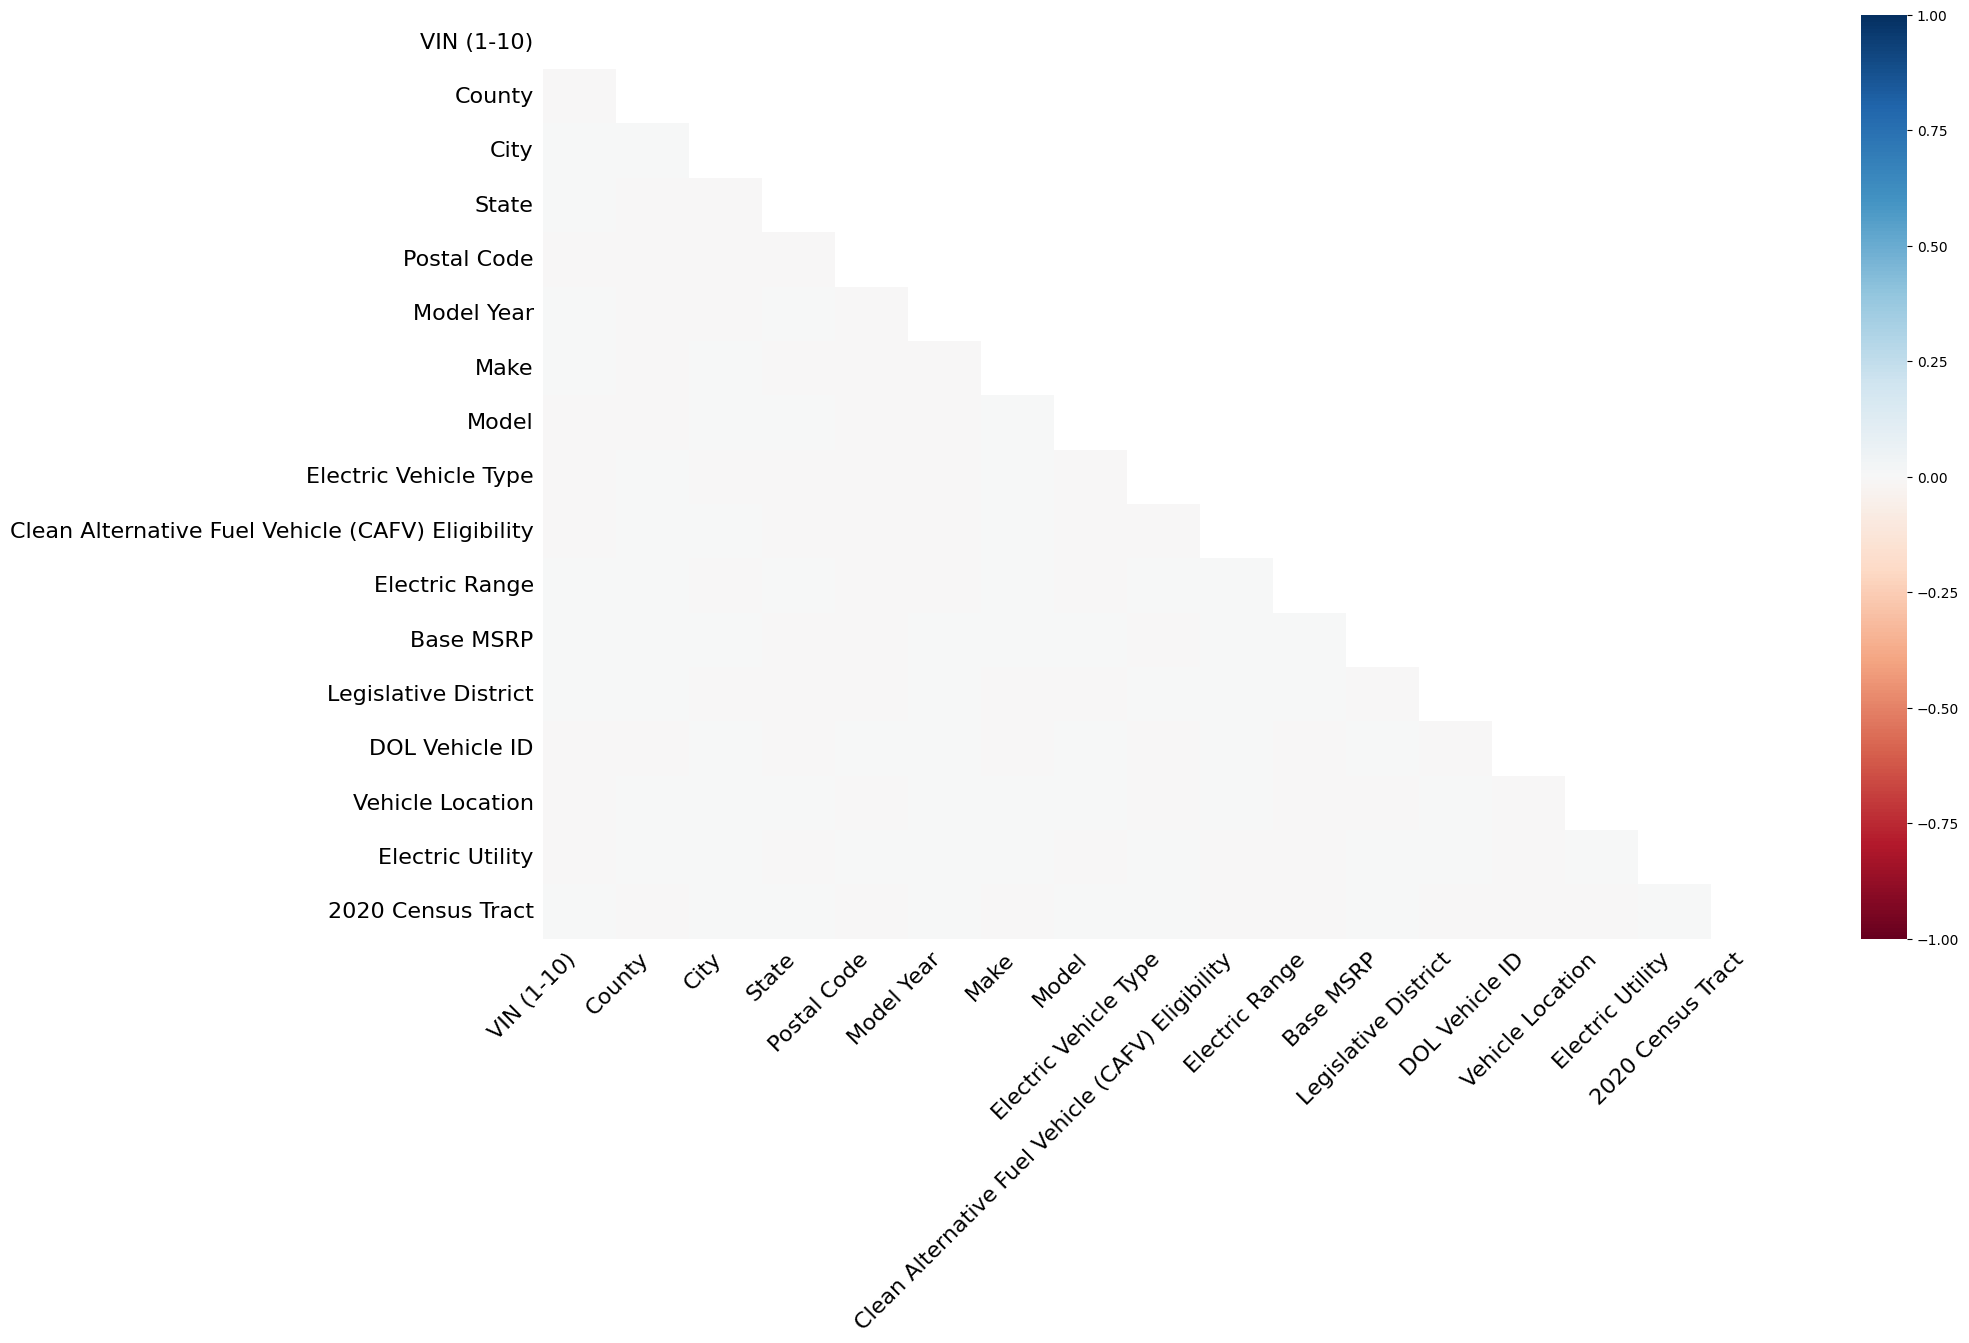

In [7]:
# Kullanilacak kutuphaneleri eklenmesi
import missingno as msno
import matplotlib.pyplot as plt

# Eksik verileri gorsellestirilmesi
msno.heatmap(df_with_missing)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

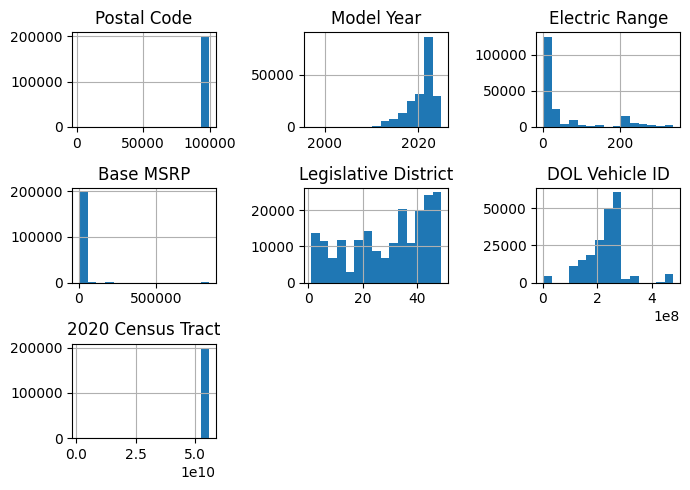

In [8]:
# Sayisal sutunlari seçelim.
numeric_columns = df_with_missing.select_dtypes(include = ['float64', 'int64']).columns

# Histogramlari cizdirelim
df_with_missing[numeric_columns].hist(bins = 15, figsize = (7,5))
plt.tight_layout()
plt.show


### Korelasyon matrisinin incelenmesi

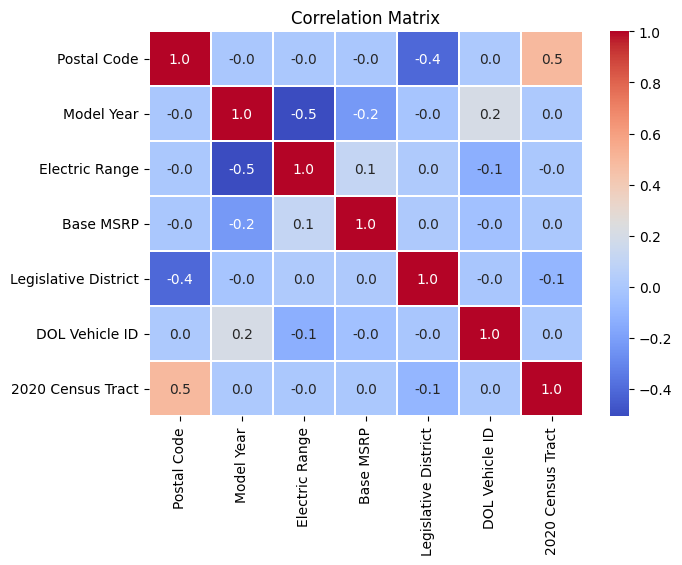

In [9]:
# Gerekli kutuphanenin eklenmesi
import seaborn as sns

# Korelasyon matrisini hesaplayalim
corr_matrix = df_with_missing[numeric_columns].corr()

# Korelasyon matrisini gorsellestirelim
plt.figure(figsize = (7,5))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.1f', linewidths = 0.2)
plt.title("Correlation Matrix")
plt.show()

# 2. Eksik Verilerin Yönetimi

### Eksik veri yönetiminde projenin amacı göz önünde bulundurulmalıdır. Veri temizleme işlemlerinin analizin sonucunu manipüle etmemesi için dikkat edilmesi gereken husular vardır.

## 2.1 Verilerin önemini anlamak
### Eksik verilerin bulunduğu bazı sütünlar bizim projemiz için kritiktir. Bu sütünlar belirlenmelidir.

## 2.2 Eksik Veri Oranı Etkisi
### Eğer bir sütünda eksik veri oranı çok yüksekse(Ben kendi projem için bu oranı yüzde 50 olarak seçtim) bu sütünun tamamını silmek mnatıklıdır. Ancak bu oran düşükse bu değerleri doldurmak daha mantıklı olacaktır.

In [10]:
# Eksik veri oranlarını inceliyorum.
missing_info = pd.DataFrame({'Eksik Deger Sayisi': df_with_missing.isnull().sum(),
                            'Eksik Veri Orani (%)': (df_with_missing.isnull().sum() / len(df_with_missing)) * 100})

# Kritik ve ikincil kritik sutunlari belirliyorum
critical_columns = ['Electric Range', 'Base MSRP', 'Make', 'Model']
secondary_columns = ['Postal Code', '2020 Census Tract']

print(missing_info)

                                                   Eksik Deger Sayisi  \
VIN (1-10)                                                       6073   
County                                                           6088   
City                                                             6052   
State                                                            6154   
Postal Code                                                      6174   
Model Year                                                       6088   
Make                                                             6029   
Model                                                            6051   
Electric Vehicle Type                                            6026   
Clean Alternative Fuel Vehicle (CAFV) Eligibility                6050   
Electric Range                                                   5990   
Base MSRP                                                        6019   
Legislative District                               

# 3. Eksik Verilerin Silinmesi

### Eksik veri oranlarını yukarda inceledik. Eğer verimizde ki  sütun eksikliği oransal olarak yüzde 50'den fazla olsaydı sütun bazında silme yapacaktık. Ama %3 gibi çok küçük bir oran olduğu için sütun bazında silme sonucu tam olarak görmemizi engeller.
### Satırlarda ise yüzde 15'den fazla eksik veri içeriyorsa o satırı silebiliriz.
### Neden %15?
#### %3 gibi çok küçük bir oranda veri boşluğumuz varken veriyi en etkli şekilde analiz etmek için %15 değeri seçilmiştir.
#### Hem veri setindeki bilgi kaybını minimize etmek hem de analiz sonuçlarını doğru tutmak için dengeli bir eşik değer olarak seçilmiştir.
#### Bu karar, hem eksik verilerin analiz sonuçlarını manipüle etme riskini azaltır hem de elimizdeki veri ile güvenilir çıkarımlar yapmamızı sağlar.

In [11]:
# Satir bazinda eksik veri orani hesaplanmasi
row_missing_ratios = df_with_missing.isnull().mean(axis=1)

#Esik degerini belirleyelim
threshold = 0.15

#Eksik veri orani esik degeri asan satirlari silelim
rows_to_drop = row_missing_ratios[row_missing_ratios > threshold].index
df_cleaned = df_with_missing.drop(index=rows_to_drop)

print(f"Silinen satir sayisi: {len(rows_to_drop)}")
print(f"Kalan satir sayisi: {df_cleaned.shape[0]}")

Silinen satir sayisi: 2662
Kalan satir sayisi: 202777


# 4. Eksik Verilerin Doldurulması

## 4.1 Kategorik Değişkenlerin Doldurulmasi

### Kategorik değişkenleri doldurmak için mod değerini kullanmaya karar verdik. Bu projede mod değeri kullanarak doldurma işlemini gerçekleştireceğiz.

* County
* City
* State
* Make
* Model
* Electric Vehicle Type
* Clean Alternative Fuel Vehicle (CAFV) Eligibility
* Electric Utility
### Bu sütunlar, çoğunlukla kategorik veri içeriyor. Mod (en sık tekrar eden değer) ile dolduracağız.

In [12]:
# Doldurulmamis halinin kopyasini alalim
df_before_cat_filling = df_with_missing.copy()

In [13]:
# Kategorik sutunlari secelim
categorical_columns = [
    'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility'
]


# Her kategorik sutundaki eksik veriyi mod ile dolduruyoruz
for column in categorical_columns:
    most_frequent = df_with_missing[column].mode()[0]
    df_with_missing[column].fillna(most_frequent, inplace=True)

#Sonuclari kontrol ediyoruz
print("Kategorik veriler dolduruldu, eksik veri orani: ")
print(df_with_missing[categorical_columns].isnull().mean() * 100)

Kategorik veriler dolduruldu, eksik veri orani: 
County                                               0.0
City                                                 0.0
State                                                0.0
Make                                                 0.0
Model                                                0.0
Electric Vehicle Type                                0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.0
Electric Utility                                     0.0
dtype: float64


In [14]:
# Doldurulan sütunlarda en sık değerleri inceleme
for column in ['County', 'City', 'State', 'Make', 'Model', 
               'Electric Vehicle Type', 
               'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
               'Electric Utility']:
    print(f"{column}:")
    print(df[column].value_counts(normalize=True).head(3))  # İlk 3 değeri göster
    print()


County:
County
King         0.512262
Snohomish    0.120334
Pierce       0.078842
Name: proportion, dtype: float64

City:
City
Seattle     0.162231
Bellevue    0.049821
Redmond     0.035734
Name: proportion, dtype: float64

State:
State
WA    0.997849
CA    0.000565
VA    0.000282
Name: proportion, dtype: float64

Make:
Make
TESLA        0.439634
CHEVROLET    0.073569
NISSAN       0.070702
Name: proportion, dtype: float64

Model:
Model
MODEL Y    0.211436
MODEL 3    0.156315
LEAF       0.065655
Name: proportion, dtype: float64

Electric Vehicle Type:
Electric Vehicle Type
Battery Electric Vehicle (BEV)            0.786311
Plug-in Hybrid Electric Vehicle (PHEV)    0.213689
Name: proportion, dtype: float64

Clean Alternative Fuel Vehicle (CAFV) Eligibility:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    0.555746
Clean Alternative Fuel Vehicle Eligible                         0.340812
Not eligible due to low battery range  

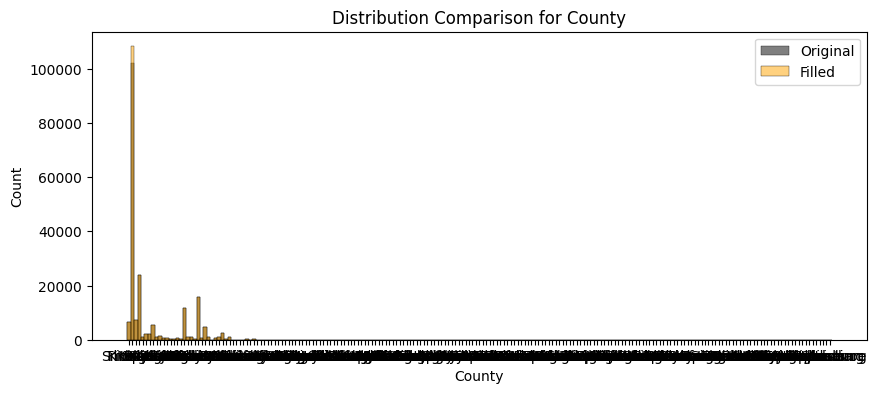

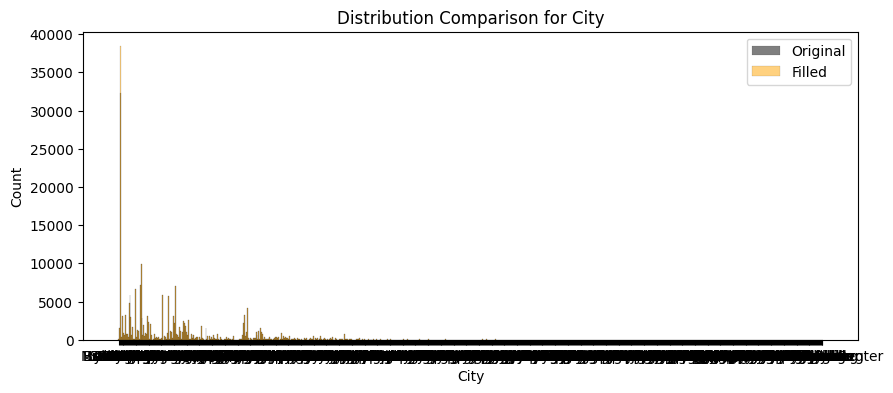

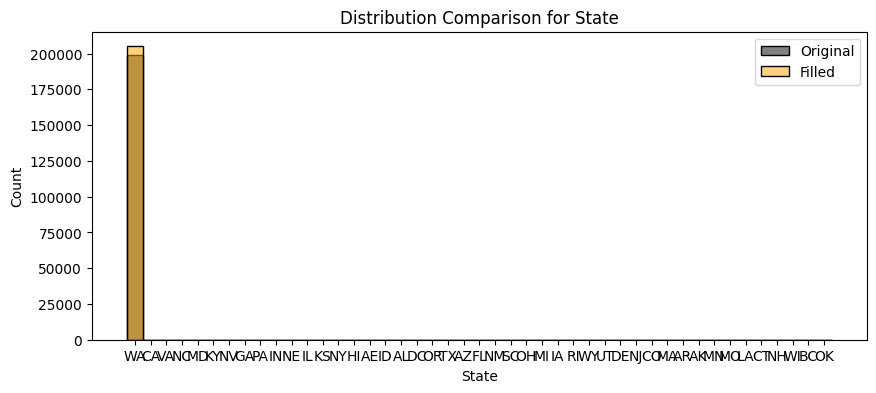

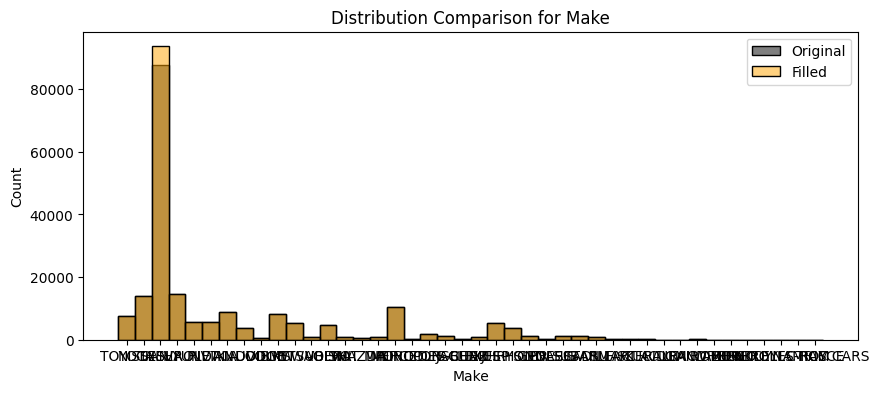

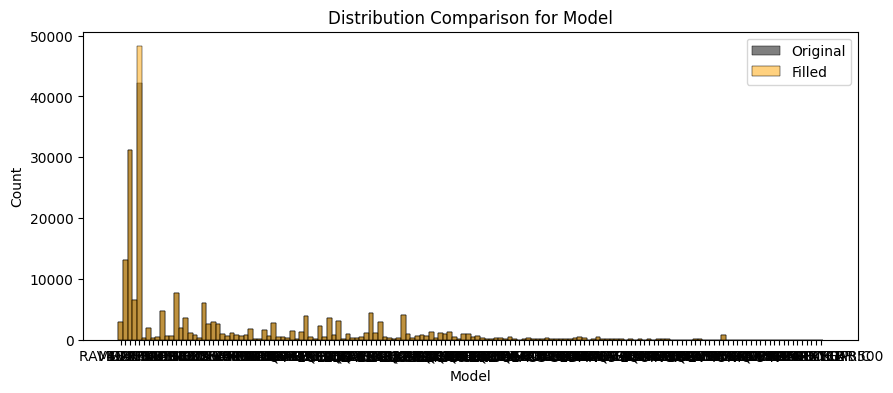

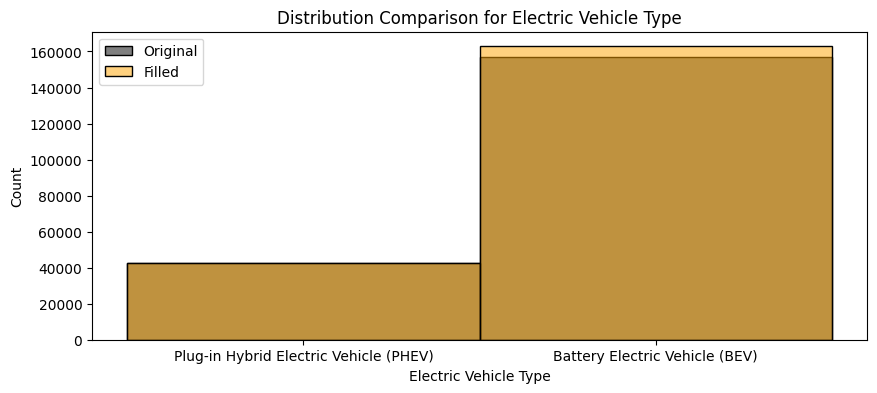

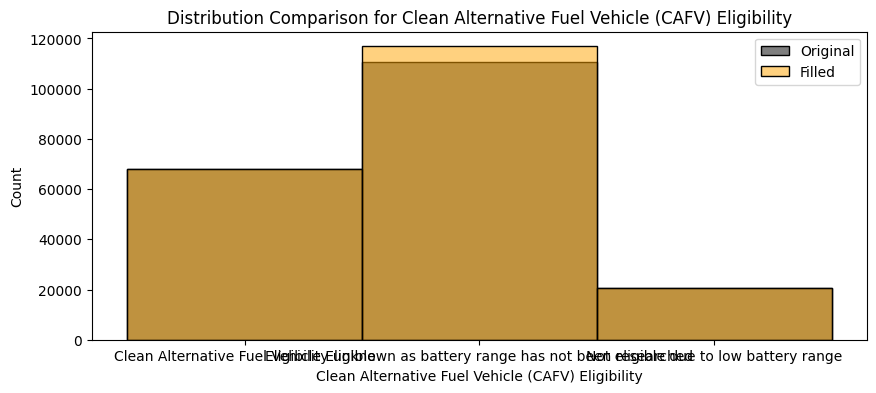

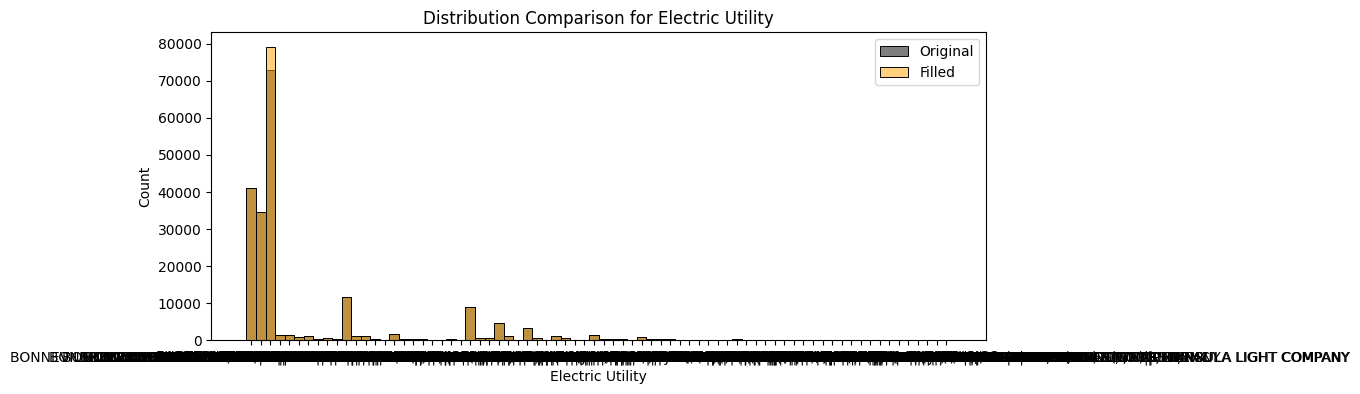

In [15]:
# Eksik verileri doldurmadan önce ve sonrasinin kiyaslanmasi
filled_columns = ['County', 'City', 'State', 'Make', 'Model', 
               'Electric Vehicle Type', 
               'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
               'Electric Utility']

for column in filled_columns:
    plt.figure(figsize=(10,4))
    sns.histplot(df_before_cat_filling[column], color='black', alpha = 0.5, label='Original')
    sns.histplot(df_with_missing[column], color='orange', alpha = 0.5, label='Filled')
    plt.title(f"Distribution Comparison for {column}")
    plt.legend()
    plt.show()

## 4.2 Numerik Sütunlardaki Verilerin Doldurulması



## 4.2.1 Eksik Veri İçeren Sütunların Belirlenmesi
#### Eksik veri oranlarını tekrar kontrol edelim. Sonrasında hangi sayısal sütunlarda işlme yapmamız gerektiğini belirleyelim.

In [16]:
# Sayisal sutunlardaki eksik verileri kontrol ediyoruz
numerical_cols = df_with_missing.select_dtypes(include=['float64','int64']).columns
print(df_with_missing[numerical_cols].isnull().sum())

Postal Code             6174
Model Year              6088
Electric Range          5990
Base MSRP               6019
Legislative District    6481
DOL Vehicle ID          6060
2020 Census Tract       6108
dtype: int64


## 4.2.2 Doldurma Yöntemine Karar Verilmesi
Sayısal verileri doldurmak için ortalama, medyan kullanılabilir. 
- Ortalama(Mean): Normal dağılıma yakın veriler için uygundur.
- Medyan(Median): Sağ ya da sol kuyruk dağılıma sahip veriler için kullanılması daha uygundur.

Sayısal sütunların histogramlarını çizerek hangi yöntemin uygun olduğunu analiz etmeliyiz.

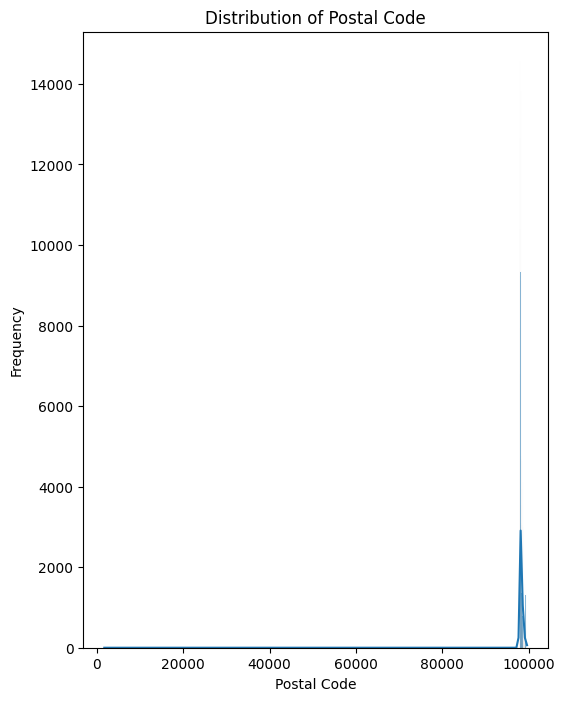

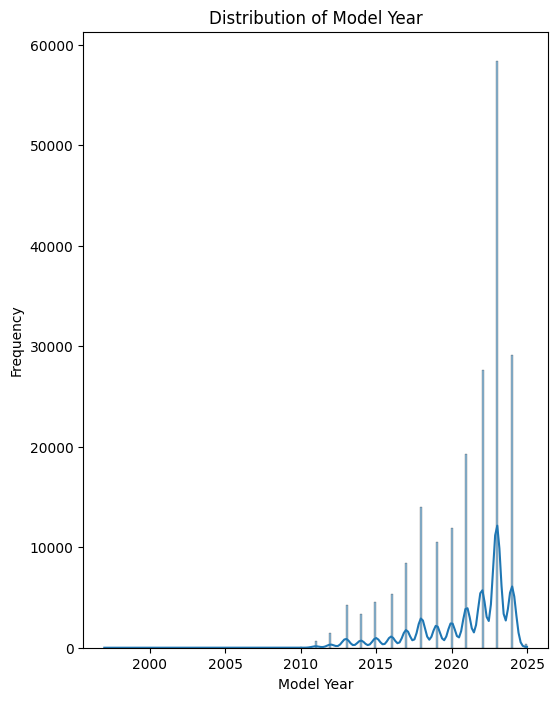

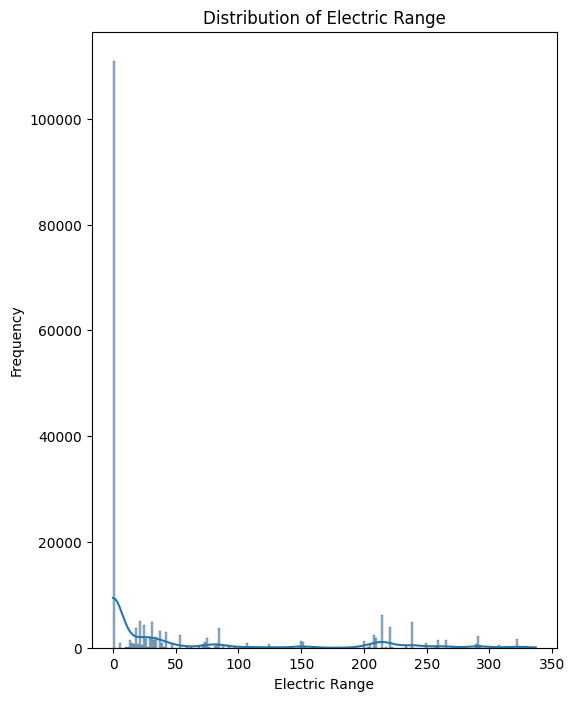

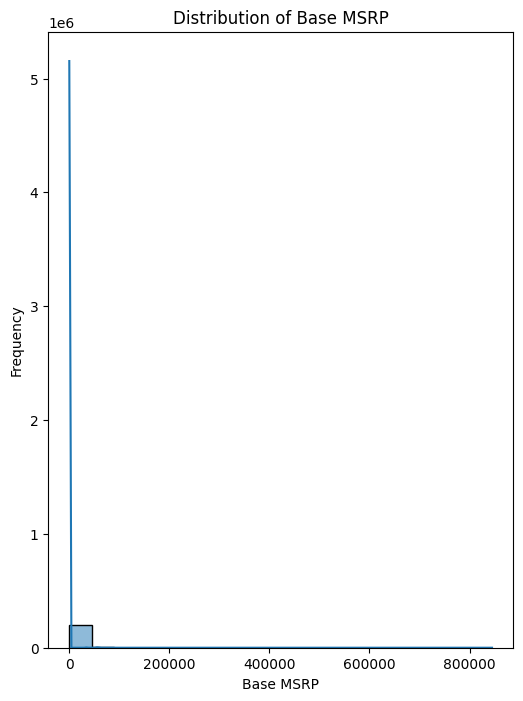

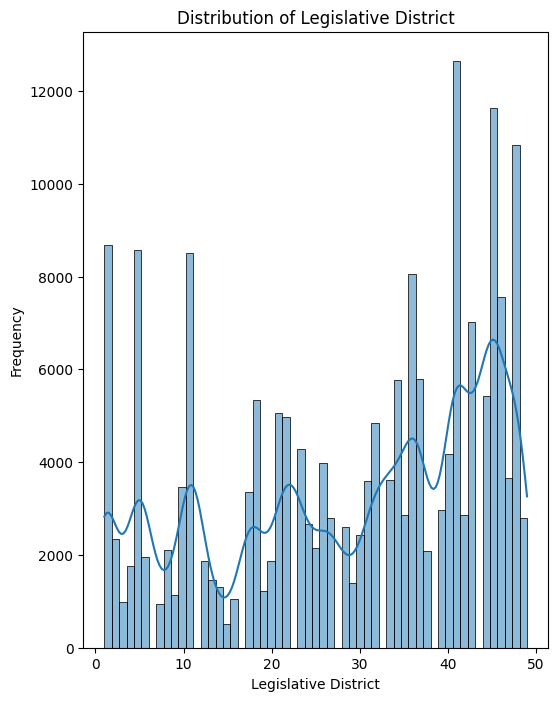

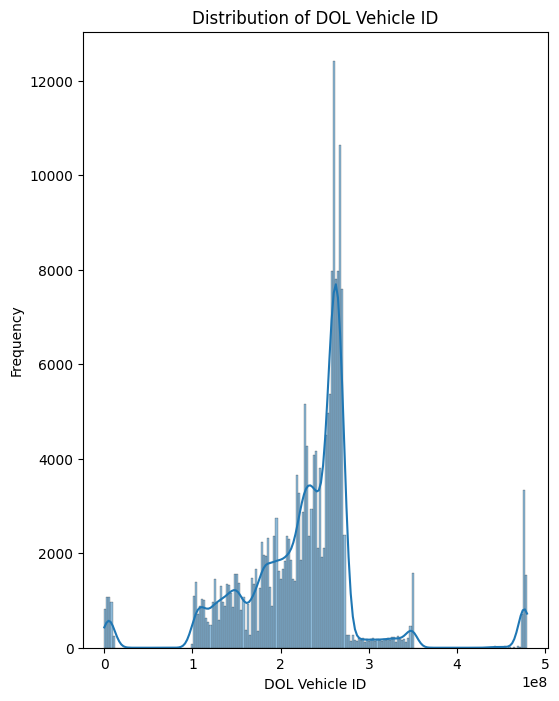

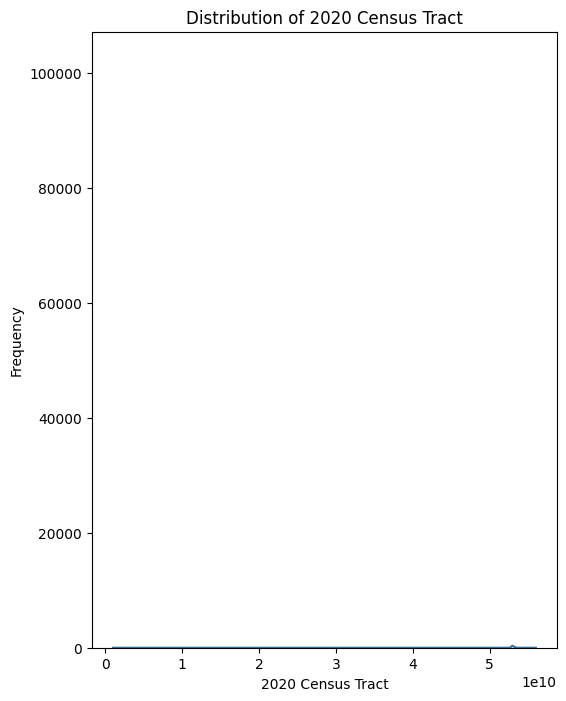

In [17]:
# Sayisal sutunlarin dagilimini inceliyoruz
for col in numerical_cols:
    plt.figure(figsize=(6,8))
    sns.histplot(df_with_missing[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

#### Her bir sütun için histogramlarımızı elde ettik. Şimdi hangi sütunu nasıl dolduracağımıza dair kararlarımızı alabiliriz.
#### Postal Code ve Base MSRP değerleri normal değere yakın dağılım sergilediği için ortalama değer ile doldurulacaktır.
#### Diğer sütunlar ise sağa veya sola doğru kuyruk dağılımına sahip olduğu için medyan değerleri ile doldurulacaktır.

In [18]:
# Numerik doldurma yapmadan önce verilerimizin kopyasını alalım.
df_before_num_filling = df_with_missing.copy()

#### Ortalama değer ile doldurulacak sütunlar
#### *Postal Code
#### *Base MSRP   

In [19]:
# Postal Code sutununun ortalama deger ile doldurulmasi
df_with_missing['Postal Code'] = df_with_missing['Postal Code'].fillna(df_with_missing['Postal Code'].mean())

# Base MSRP sutununun ortalama deger ile doldurulmasi
df_with_missing['Base MSRP'] = df_with_missing['Base MSRP'].fillna(df_with_missing['Base MSRP'].mean())



#### Medyan ile doldurulacak sütunlar
#### *Model Year
#### *Electric Range
#### *Legislative District  
#### *DOL Vehicle ID      
#### *2020 Census Tract

In [20]:
# Model Year sutununun medyan degeri ile doldurulmasi
df_with_missing['Model Year'] = df_with_missing['Model Year'].fillna(df_with_missing['Model Year'].median())

# Electric Range sutununun medyan degeri ile doldurulmasi 
df_with_missing['Electric Range'] = df_with_missing['Electric Range'].fillna(df_with_missing['Electric Range'].median())

# Legislative District sutununun medyan degeri ile doldurulmasi
df_with_missing['Legislative District'] = df_with_missing['Legislative District'].fillna(df_with_missing['Legislative District'].median())

# DOL Vehicle ID sutununun medyan degeri ile doldurulmasi
df_with_missing['DOL Vehicle ID'] = df_with_missing['DOL Vehicle ID'].fillna(df_with_missing['DOL Vehicle ID'].median())

# 2020 Census Tract sutununun ortalama deger ile doldrurulmasi
df_with_missing['2020 Census Tract'] = df_with_missing['2020 Census Tract'].fillna(df_with_missing['2020 Census Tract'].median())


In [21]:
# Doldurma işlemi gerçekleşmiş mi kontrol edelim
print(df_with_missing[numerical_cols].isnull().sum())

Postal Code             0
Model Year              0
Electric Range          0
Base MSRP               0
Legislative District    0
DOL Vehicle ID          0
2020 Census Tract       0
dtype: int64


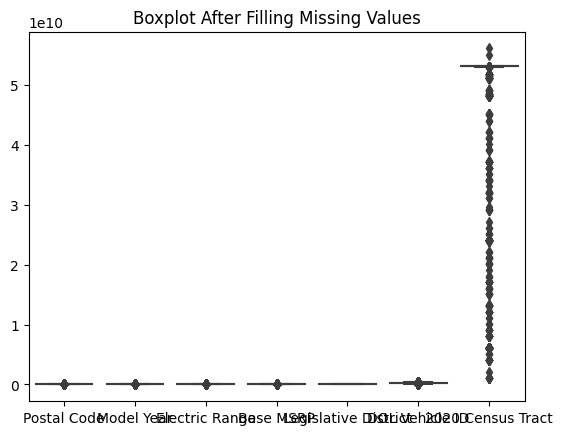

In [22]:
sns.boxplot(data=df_with_missing[numerical_cols])
plt.title("Boxplot After Filling Missing Values")
plt.show()

## 4.2.3 Sıfır Değeri İçeren Sütunların Belirlenmesi

"0" değerleri genellikle eksik veya anlamlı bir bilgi taşımayan değerler olabilir ve analiz sonuçlarını yanıltabilir. Bu yüzden, bu değerlerin kontrol edilmesi ve uygun şekilde düzeltilmesi oldukça önemlidir.

In [23]:
# Sifir değerlerinin tespitini yapiyoruz
numeric_columns = df_with_missing.select_dtypes(include=['float64', 'int64']).columns
zero_values_count = (df_with_missing[numeric_columns] == 0).sum()

print("Sutunlarda sifir degerinin sayisi: ")
print(zero_values_count[zero_values_count > 0])

Sutunlarda sifir degerinin sayisi: 
Electric Range    116893
Base MSRP         196211
dtype: int64


## 4.2.3.1 Marka ve Model Bazlı Kontrol

Her bir marka ve model için Base MSRP ve Electric Range sütunlarının sıfır olup olmadığını kontrol edelim.



In [24]:
# Marka ve model bazında sifir değerlerini kontrol ediyoruz.
zero_check = df_with_missing[df_with_missing[['Base MSRP', 'Electric Range']].eq(0).any(axis=1)] \
    .groupby(['Make', 'Model'])[['Base MSRP', 'Electric Range']] \
    .size().reset_index(name='Zero Count')

print("Marka ve modele göre sifir değeri olan araçlar:")
print(zero_check)


Marka ve modele göre sifir değeri olan araçlar:
           Make    Model  Zero Count
0         ACURA      ZDX          31
1    ALFA ROMEO  MODEL Y           3
2    ALFA ROMEO   TONALE          70
3          AUDI       A3         511
4          AUDI     A7 E           7
..          ...      ...         ...
290       VOLVO      S90          36
291       VOLVO      V60          64
292       VOLVO     XC40        1060
293       VOLVO     XC60        1036
294       VOLVO     XC90        1456

[295 rows x 3 columns]


## 4.2.3.2 Marka ve Model Bazlı Doldurma İşlemi

Marka ve modelleri baz alarak sıfır içeren değerleri dolduruyoruz.

- Eğer o marka ve o modelde başka bir aracın verisi girilmiş ise sıfır değerinin yerine belirlenen değeri dolduracağız.
- Eğer o marka ve o modele ait hiçbir veri bulunmamışsa o sütunun ortalaması ile dolduracağız. 

In [25]:
# Ortalama degerleri hesaplayalim
overall_base_msrp_mean = df_with_missing[df_with_missing['Base MSRP'] != 0]['Base MSRP'].mean()
overall_electric_range_mean = df_with_missing[df_with_missing['Electric Range'] != 0]['Electric Range'].mean()

In [26]:
# Marka ve modele gore sifir olmayan ortalamalari hesaplayalim
base_msrp_averages = df_with_missing[df_with_missing['Base MSRP'] != 0].groupby(['Make', 'Model'])['Base MSRP'].mean()
electric_range_averages = df_with_missing[df_with_missing['Electric Range'] != 0].groupby(['Make', 'Model'])['Electric Range'].mean()

In [27]:
df_before_num_zero_filling = df_with_missing.copy()

In [28]:
# Sifir olan Base MSRP degerlerini dolduralim
df_with_missing['Base MSRP'] = df_with_missing.apply(
    lambda row: base_msrp_averages.get((row['Make'], row['Model']), overall_base_msrp_mean) 
                if row['Base MSRP'] == 0 else row['Base MSRP'], axis=1)

# Sifir olan Electric Range degerlerini dolduralim
df_with_missing['Electric Range'] = df_with_missing.apply(
    lambda row: electric_range_averages.get((row['Make'], row['Model']), overall_electric_range_mean) 
                if row['Electric Range'] == 0 else row['Electric Range'], axis=1)


In [29]:
# 5. Sonuclari kontrol et
print("Base MSRP'de sıfır kalan değerler:", (df_with_missing['Base MSRP'] == 0).sum())
print("Electric Range'de sıfır kalan değerler:", (df_with_missing['Electric Range'] == 0).sum())


Base MSRP'de sıfır kalan değerler: 0
Electric Range'de sıfır kalan değerler: 0


In [30]:
# Doldurulan örnekleri görmek için birkaç satır göster
print(df_with_missing.head(10))

   VIN (1-10)     County       City State   Postal Code  Model Year  \
0  JTMAB3FV3P     Kitsap    Seabeck    WA  98380.000000      2023.0   
1  1N4AZ1CP6J     Kitsap  Bremerton    WA  98312.000000      2018.0   
2  5YJ3E1EA4L       King    Seattle    WA  98101.000000      2020.0   
3  1N4AZ0CP8E       King    Seattle    WA  98125.000000      2014.0   
4  1G1FX6S00H   Thurston       Yelm    WA  98597.000000      2017.0   
5  5YJYGDEE5L  Snohomish   Lynnwood    WA  98036.000000      2020.0   
6  KM8S6DA23N     Kitsap    Poulsbo    WA  98370.000000      2022.0   
7  7FCTGAAA1P  Snohomish  Arlington    WA  98223.000000      2023.0   
8  5YJYGDEE9L       King       Kent    WA  98031.000000      2020.0   
9  1N4AZ0CP2F       King    Seattle    WA  98178.282373      2015.0   

        Make       Model                   Electric Vehicle Type  \
0     TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1     NISSAN        LEAF          Battery Electric Vehicle (BEV)   
2      TESLA  

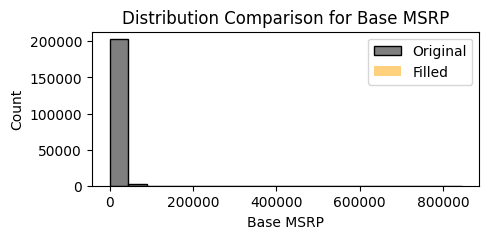

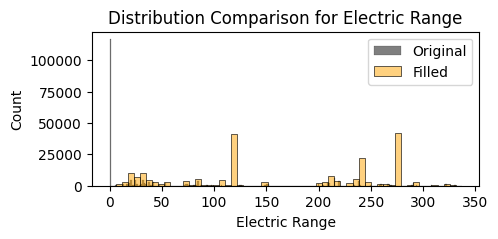

In [31]:
# Eksik verileri doldurmadan önce ve sonrasinin kiyaslanmasi
filled_columns = ['Base MSRP', 'Electric Range']

for column in filled_columns:
    plt.figure(figsize=(5,2))
    sns.histplot(df_before_num_zero_filling[column], color='black', alpha = 0.5, label='Original')
    sns.histplot(df_with_missing[column], color='orange', alpha = 0.5, label='Filled')
    plt.title(f"Distribution Comparison for {column}")
    plt.legend()
    plt.show()

# 5. Sonuç Analizlerinin Yapılması

## 5.1 Şehir Bazlı Elektrikli Araç Dağılımı Analizi
### Bu analiz sürecimizde şehirlerin adını içeren sütunu kullanarak araç sayılarını gruplandıracağız ve bu bilgiyi bar grafik ile görselleştireciz.
### Her şehirdeki araç sayısını hesaplayacağız.
### Araç sayılarını en yüksekten en düşüğe doğru sıralayacağız.
### İlk 10 şehri seçerek bir bar grafiği çizeceğiz ve yoğunluğun en fazla olduğu şehirleri göreceğiz.

### Tüm dünya için gerekli analizin yapılması

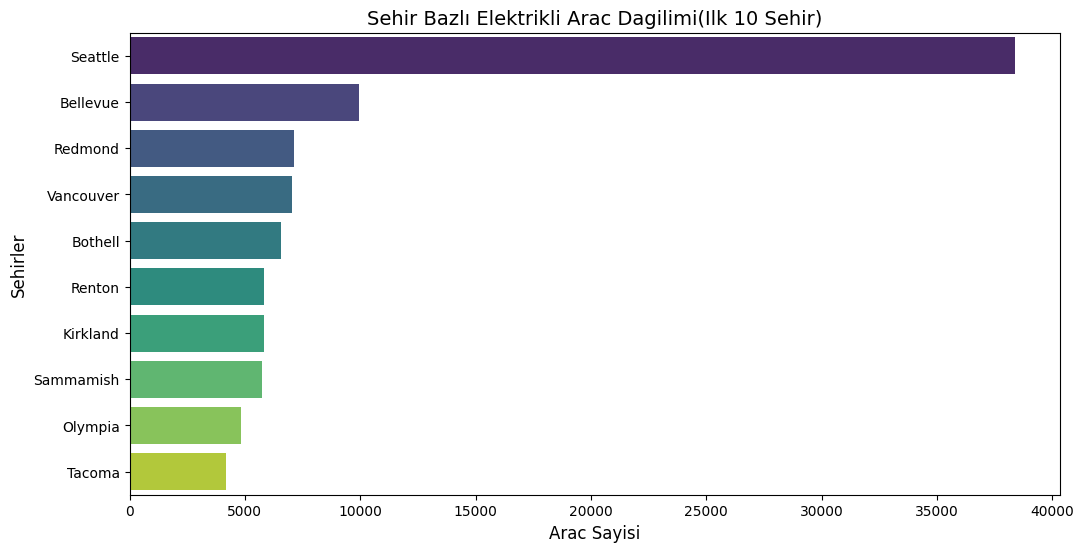

In [32]:
# Sehir bazında arac sayilarini gruplandiriyoruz
city_counts = df_with_missing['City'].value_counts()

# Ilk 10 sehri seciyoruz
top_10_cities = city_counts.head(10)

#Gorsellestirme
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')
plt.title('Sehir Bazlı Elektrikli Arac Dagilimi(Ilk 10 Sehir)',fontsize=14)
plt.xlabel('Arac Sayisi',fontsize=12)
plt.ylabel('Sehirler', fontsize=12)
plt.show()

### Yaptığımız analizden elde edilen ilk verilere göre Seattle en yakın rakibi olan Bellevue şehrine oranla 4 kat daha fazla elektrikli araç kullanımına sahip. Bu yüzden analizimize Seattle şehrinin üstünden devam edeceğiz.
### Bu şehirde kullanılan araçların Elektrikli araç tipi, Marka ve Model gibi özel nitelikleri üzerinden analizler yapacağız.

In [33]:
# Seattle ve diger sehirleri ayiriyoruz.
seattle_df = df_with_missing[df_with_missing['City'] == 'Seattle']
other_cities_df = df_with_missing[df_with_missing['City'] != 'Seattle']

In [34]:
# Seattle sehrindeki araclarin turlerini ve markalarini inceliyoruz
seattle_ev_type = seattle_df['Electric Vehicle Type'].value_counts()
seattle_make = seattle_df['Make'].value_counts()

# Diger sehirlere de bu islemleri yapiyoruz
other_cities_ev_type = other_cities_df['Electric Vehicle Type'].value_counts()
other_cities_make = other_cities_df['Make'].value_counts()

# Sonuclari Yazdiriyoruz
print("Seattle - Elektrikli Arac Turleri: ",seattle_ev_type)
print("Seattle - Marka Dagilimi: ",seattle_make)

print("Diger Sehirler - Elektrikli Arac Turleri: ",other_cities_ev_type)
print("Diger Sehirler - Marka Dagilimi: ",other_cities_make)

Seattle - Elektrikli Arac Turleri:  Electric Vehicle Type
Battery Electric Vehicle (BEV)            30857
Plug-in Hybrid Electric Vehicle (PHEV)     7535
Name: count, dtype: int64
Seattle - Marka Dagilimi:  Make
TESLA             15835
NISSAN             3076
CHEVROLET          2844
BMW                1924
KIA                1736
FORD               1665
TOYOTA             1468
VOLVO              1433
VOLKSWAGEN         1432
HYUNDAI            1379
RIVIAN             1140
AUDI               1028
JEEP                502
CHRYSLER            431
POLESTAR            335
MERCEDES-BENZ       319
MINI                316
FIAT                227
PORSCHE             214
HONDA               177
MITSUBISHI          150
SUBARU              147
LEXUS               108
MAZDA                96
CADILLAC             89
LUCID                66
SMART                56
GENESIS              46
JAGUAR               38
FISKER               31
LINCOLN              24
DODGE                24
ALFA ROMEO          

### Bu analiz sonucunu görsel olarak görelim

Text(0, 0.5, 'Adet')

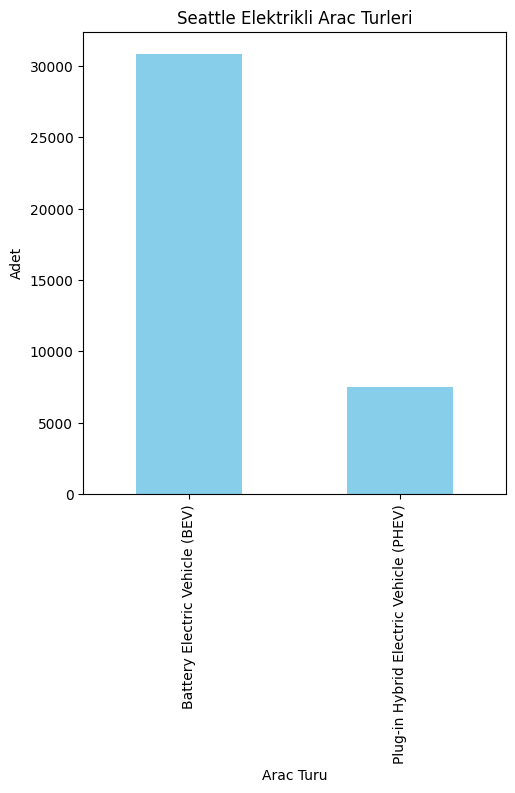

In [35]:
plt.figure(figsize=(12,6))

# Seattle icin grafik
plt.subplot(1,2,1)
seattle_ev_type.plot(kind='bar', color='skyblue')
plt.title('Seattle Elektrikli Arac Turleri')
plt.xlabel('Arac Turu')
plt.ylabel('Adet')

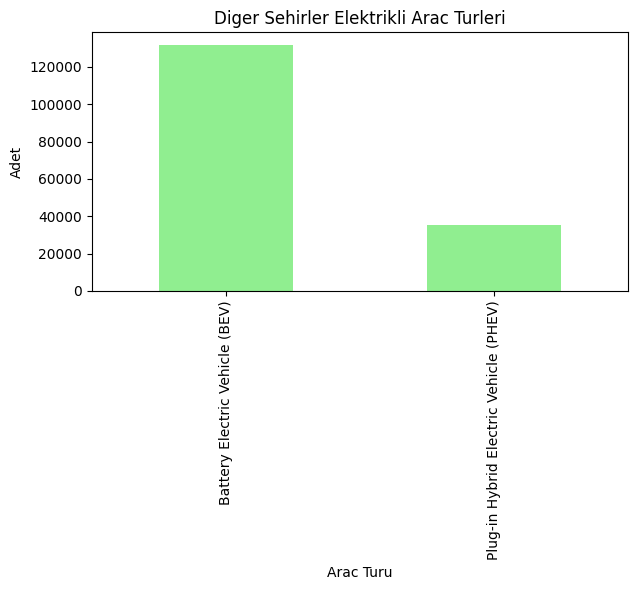

In [36]:
plt.figure(figsize=(12,6))

#Diger Sehirler icin grafik
plt.subplot(1,2,1)
other_cities_ev_type.plot(kind='bar', color='lightgreen')
plt.title('Diger Sehirler Elektrikli Arac Turleri')
plt.xlabel('Arac Turu')
plt.ylabel('Adet')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Adet')

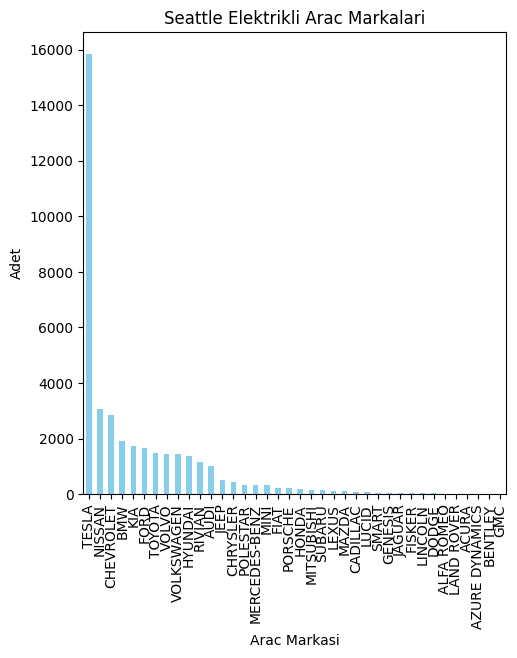

In [37]:
plt.figure(figsize=(12,6))

# Seattle icin grafik
plt.subplot(1,2,1)
seattle_make.plot(kind='bar', color='skyblue')
plt.title('Seattle Elektrikli Arac Markalari')
plt.xlabel('Arac Markasi')
plt.ylabel('Adet')

Text(0, 0.5, 'Adet')

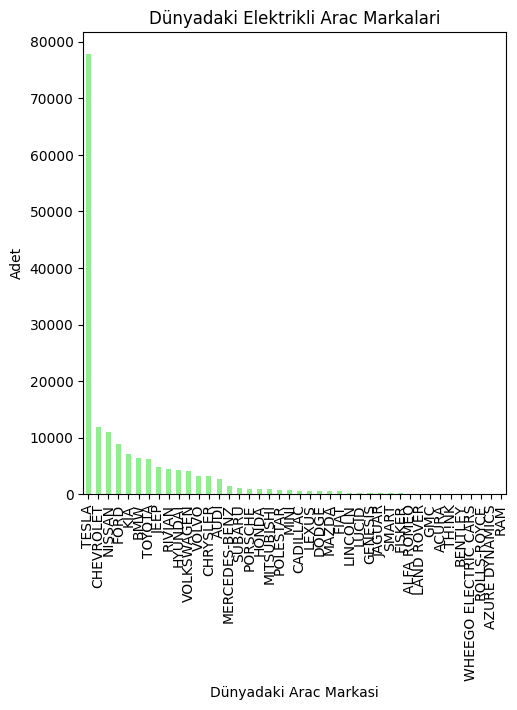

In [38]:
plt.figure(figsize=(12,6))

# Diger sehirler icin marka grafigi
plt.subplot(1,2,1)
other_cities_make.plot(kind='bar', color='lightgreen')
plt.title('Dünyadaki Elektrikli Arac Markalari')
plt.xlabel('Dünyadaki Arac Markasi')
plt.ylabel('Adet')

## 5.2 Tesla Ve Diğer Markaların Karşılaştrılması

In [39]:
# Tesla araclarini ve digerlerini ayiriyoruz
tesla_cars = df_with_missing[df_with_missing['Make'] == 'TESLA']
non_tesla_cars = df_with_missing[df_with_missing['Make'] != 'TESLA']
nissan_cars = df_with_missing[df_with_missing['Make'] == 'NISSAN']
chevrolet_cars = df_with_missing[df_with_missing['Make'] == 'CHEVROLET']

# Ortalama karsilastirilmasi
features = ['Base MSRP', 'Electric Range']
comparison = {
    "Feature": [],
    "Tesla Average": [],
    "Non-Tesla Average": []
}

for feature in features:
    comparison["Feature"].append(feature)
    comparison["Tesla Average"].append(tesla_cars[feature].mean())
    comparison["Non-Tesla Average"].append(non_tesla_cars[feature].mean())

comparison_df = pd.DataFrame(comparison)
print(comparison_df)


          Feature  Tesla Average  Non-Tesla Average
0       Base MSRP    7081.336421        3907.165348
1  Electric Range     249.306836          93.181343


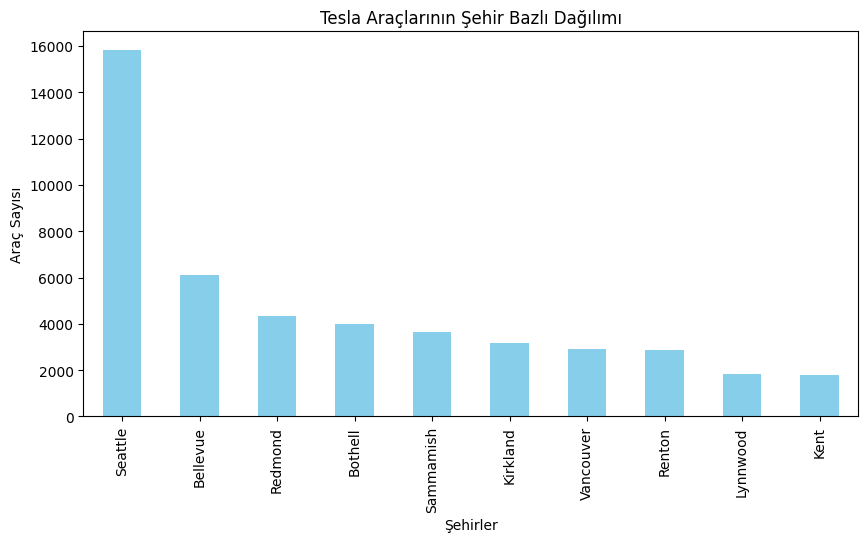

In [40]:
# Sehir bazinda Tesla sayilari
tesla_city_distribution = tesla_cars['City'].value_counts()

# Görselleştiriyoruz
tesla_city_distribution.head(10).plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title('Tesla Araçlarının Şehir Bazlı Dağılımı')
plt.xlabel('Şehirler')
plt.ylabel('Araç Sayısı')
plt.show()


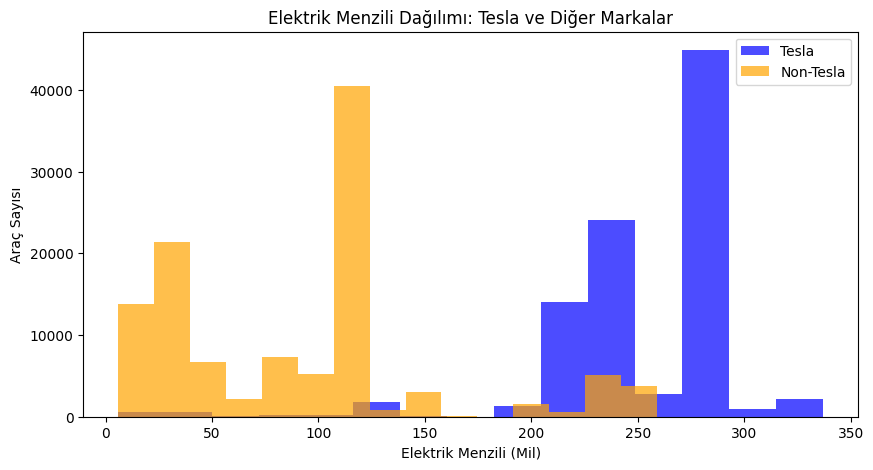

In [41]:
# Menzil karsilastirmasi
plt.figure(figsize=(10, 5))
plt.hist(tesla_cars['Electric Range'], bins=15, alpha=0.7, label='Tesla', color='blue')
plt.hist(non_tesla_cars['Electric Range'], bins=15, alpha=0.7, label='Non-Tesla', color='orange')
plt.title('Elektrik Menzili Dağılımı: Tesla ve Diğer Markalar')
plt.xlabel('Elektrik Menzili (Mil)')
plt.ylabel('Araç Sayısı')
plt.legend()
plt.show()


### Tüm şehirlerde kullanım bakımından ilk 3'te olan markaların menzil karşılaştırılmasını yapıyoruz.

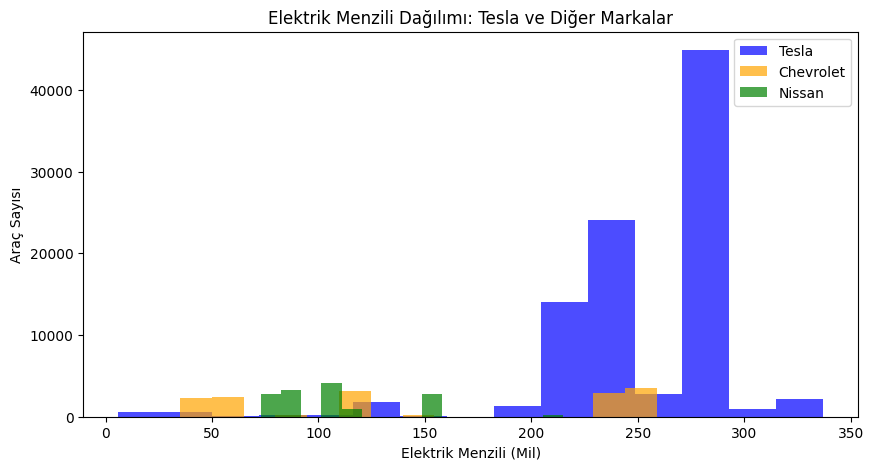

In [42]:
# Menzil karsilastirmasi
plt.figure(figsize=(10, 5))
plt.hist(tesla_cars['Electric Range'], bins=15, alpha=0.7, label='Tesla', color='blue')
plt.hist(chevrolet_cars['Electric Range'], bins=15, alpha=0.7, label='Chevrolet', color='orange')
plt.hist(nissan_cars['Electric Range'], bins=15, alpha=0.7, label='Nissan', color='green')
plt.title('Elektrik Menzili Dağılımı: Tesla ve Diğer Markalar')
plt.xlabel('Elektrik Menzili (Mil)')
plt.ylabel('Araç Sayısı')
plt.legend()
plt.show()

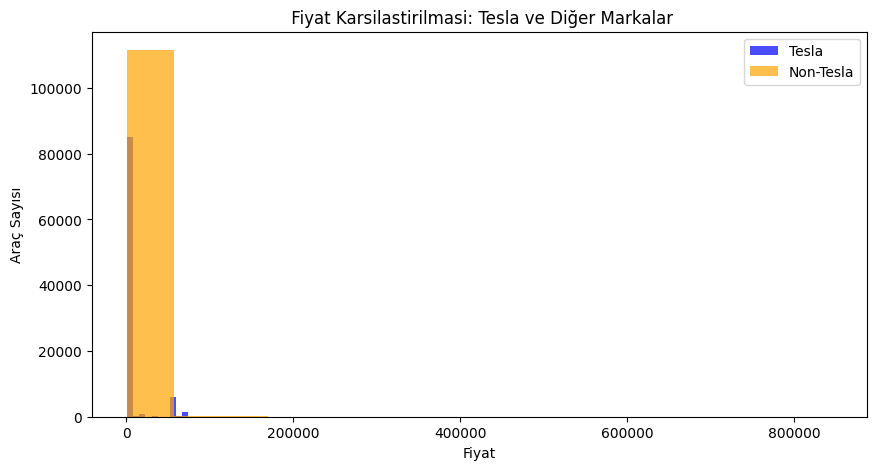

In [43]:
# Fiyat karsilastirmasi
plt.figure(figsize=(10, 5))
plt.hist(tesla_cars['Base MSRP'], bins=15, alpha=0.7, label='Tesla', color='blue')
plt.hist(non_tesla_cars['Base MSRP'], bins=15, alpha=0.7, label='Non-Tesla', color='orange')
plt.title(' Fiyat Karsilastirilmasi: Tesla ve Diğer Markalar')
plt.xlabel('Fiyat')
plt.ylabel('Araç Sayısı')
plt.legend()
plt.show()

### Tüm şehirlerde kullanım bakımından ilk 3'te olan markaların fiyat karşılaştırılmasını yapıyoruz.

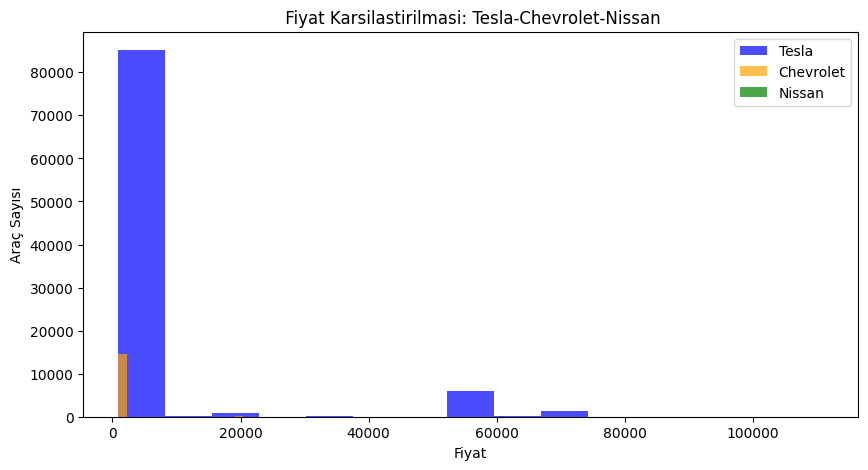

In [44]:
# Fiyat karsilastirmasi Tesla-Chevrolet-Nissan
plt.figure(figsize=(10, 5))
plt.hist(tesla_cars['Base MSRP'], bins=15, alpha=0.7, label='Tesla', color='blue')
plt.hist(chevrolet_cars['Base MSRP'], bins=15, alpha=0.7, label='Chevrolet', color='orange')
plt.hist(nissan_cars['Base MSRP'], bins=15, alpha=0.7, label='Nissan', color='green')
plt.title(' Fiyat Karsilastirilmasi: Tesla-Chevrolet-Nissan')
plt.xlabel('Fiyat')
plt.ylabel('Araç Sayısı')
plt.legend()
plt.show()

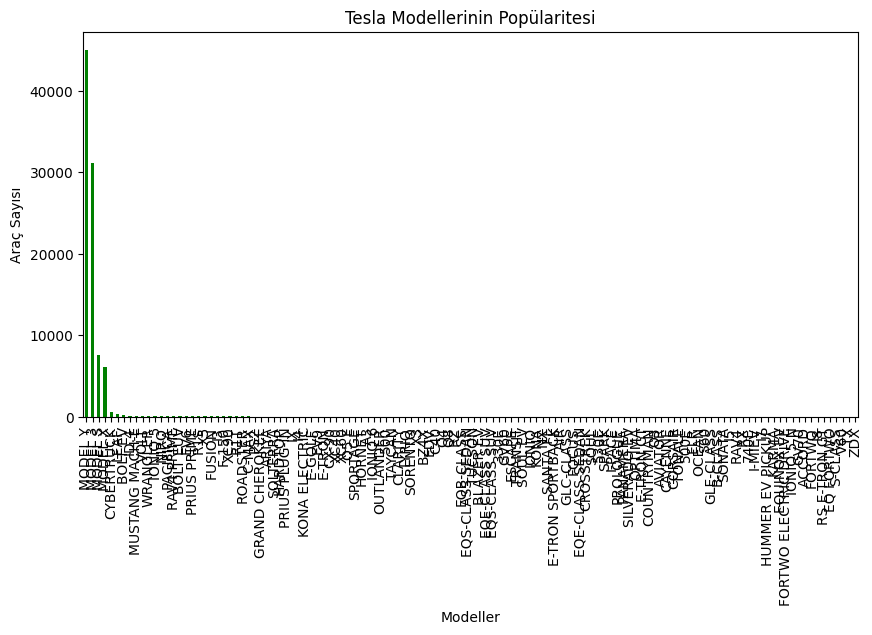

In [45]:
# Tesla modellerinin popularitesini buluyoruz
tesla_model_distribution = tesla_cars['Model'].value_counts()

# Görselleştiriyoruz
tesla_model_distribution.plot(kind='bar', color='green', figsize=(10, 5))
plt.title('Tesla Modellerinin Popülaritesi')
plt.xlabel('Modeller')
plt.ylabel('Araç Sayısı')
plt.show()


## 6. Sonuç Analiz Raporu  

### Proje Başlığı: Elektrikli Araçların Pazardaki Durumu ve Tesla'nın Liderliği  

### Projenin Amacı
1. **Elektrikli araçların şehirler arası dağılımını analiz etmek.**
2. **Elektrikli araçlar arasında en yaygın markaları belirlemek.**
3. **Tesla'nın pazar liderliğinin nedenlerini anlamak.**
4. **Enerji altyapısı yatırımları için somut öneriler geliştirmek.**
dık.  

---

### Proje Süreci ve Adımları  

#### 1️⃣ Veri Hazırlığı ve Eksik Veri Yönetimi  
- Kaggle üzerinden elde edilen **Electric Vehicle Population Data** veri seti incelenmiştir.  
- Veri setindeki eksik veriler tespit edilmiş ve rastgele **NaN** değerler eklenerek eksik veri yönetimi süreçleri test edilmiştir.  
- Eksik veriler, marka ve model bazında doldurulmuş, bu mümkün olmadığında genel ortalama değerleri
- Veriyi manipüle edebilecek birkaç sütunun satırlarında yüksek sayıda "0" değeri tespit edilmiştir. İlgili satırların muadil satırlarında değer bulunuyorsa o değer ile, eğer muadil değer yoksa ortalama değer ile doldurulmuştur.ullanılmıştır.  
- Bu süreçler, verilerin analize uygun hale getirilmesini sağlamıştır.  

#### 2️⃣ Şehir Bazlı Elektrikli ve Hibrit Araç Analizi  
- Elektrikli araçların şehirler arası dağılımında, **Seattle** en yüksek elektrikli araç yoğunluğuna sahip şehir olarak belirlenmiştir.  
- Elektrikli araçların hibrit araçlara kıyasla daha hızlı bir şekilde popülerlik kazandığı görülmüştür.  
- Bu analiz, elektrikli araçların gelecekte daha büyük bir pazar payı alacağını ve fosil yakıt sektörüne olan etkisini vurgulamıştır.  

#### 3️⃣ Elektrikli Araç Markalarının Dağılımı  
- Elektrikli araçlar arasında en yaygın kullanılan markalar analiz edilmiştir.  
- Tesla, hem **Seattle**'da hem de diğer şehirlerde pazar lideri olarak öne çıkmıştır:  
  - **Seattle'da kullanılan Tesla araçları**, diğer tüm markaların toplamından yaklaşık 8 kat fazladır.  
  - En çok tercih edilen diğer markalar **Chevrolet** ve **Nissan** olarak sıralanmıştır.  

#### 4️⃣ Tesla’nın Pazar Liderliğinin Nedenleri  
Tesla’nın neden lider olduğu detaylı bir şekilde analiz edilmiştir:  
- **Elektrik Menzili Avantajı:** Tesla araçlarının menzili, rakiplerine kıyasla oldukça yüksektir.  
- **Fiyat-Performans Oranı:** Tesla, başlangıç fiyatlarına oranla "mil başına fiyat" analizinde üstün performans göstermektedir.  
- **Teknolojik Yenilikler:** Tesla'nın otonom sürüş gibi yenilikçi teknolojileri, markayı öne çıkarmaktadır.  
- **Popüler Modeller:** Tesla’nın **Model 3** ve **Model Y** gibi uygun fiyatlı modelleri, liderliğini pekiştiren faktörlerdir.  

---

### Sonuç ve Öneriler  

#### 📝 Sonuçlar  
1. Elektrikli araç pazarı hızla büyümekte, Tesla bu pazarın açık ara lideri olarak konumlanmaktadır.  
2. Tesla'nın başarısının temel nedenleri:  
   - **Elektrik menzili**  
   - **Fiyat-performans oranı**  
   - **Teknolojik yenilikler**  
3. Elektrikli araçların popülerliği, hibrit araçların ve fosil yakıtlı araçların önüne geçmektedir.  

#### 💡 Öneriler  
1. Elektrikli araç şarj altyapısına yatırım yapılabilir. Özellikle **Seattle** gibi elektrikli araç kullanımının yoğun olduğu bölgelerde şarj istasyonları kurarak pazar payı artırılabilir.  
2. Elektrikli araçlarla **entegre enerji çözümleri** geliştirilmelidir.  
   - Evde kullanılabilecek yenilenebilir enerji destekli şarj cihazları sunulabilir.  
   - Elektrikli araç markaları ile iş birliği yapılabilir.  
3. **Tesla gibi lider markalarla iş birlikleri** kurularak şarj altyapısında avantaj sağlanabilir ve marka prestiji artırılabilir.  

---

### Notlar:  
- Bu analiz sonuçları, yalnızca Washington eyaleti ve seçili veri setine dayanmaktadır.  
- Daha geniş kapsamlı bir analiz için farklı eyaletlerden veya ülkelerden veri eklenebilir.  
- Gelecekte, enerji altyapısının geliştirilmesi ve kullanıcı davranışlarının detaylı analizi yapılabilir.  
